<a href="https://colab.research.google.com/github/lucasdataanalytics/Data-Science-Pyhton/blob/main/An%C3%A1lise_Retorno_A%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação dos Dados Bancários

In [174]:
# Importar Bibliotecas para Análise

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [220]:
# Dados de Fechamento das Ações

dados_bancarios = yf.download(["ITUB4.SA","BBAS3.SA","SANB4.SA","BBDC4.SA","^BVSP"],start="2010-01-01",
                            end = "2022-12-31")["Adj Close"]

[*********************100%%**********************]  5 of 5 completed


In [176]:
display(dados_bancarios)

Ticker,BBAS3.SA,BBDC4.SA,ITUB4.SA,SANB4.SA,^BVSP
Date,,,,,
2010-01-04,5.729130,6.989872,10.042393,4.719923,70045.0
2010-01-05,5.671647,6.955468,10.107471,4.719923,70240.0
2010-01-06,5.679311,6.899827,10.019868,4.719923,70729.0
2010-01-07,5.681230,6.881276,9.917241,4.719923,70451.0
2010-01-08,5.713799,6.873859,9.767046,4.719923,70263.0
...,...,...,...,...,...
2022-12-23,15.713290,13.188933,22.846010,13.518714,109698.0
2022-12-26,15.691021,12.875328,22.392538,13.518714,108738.0
2022-12-27,15.169917,12.814348,22.265564,13.491587,108347.0


# Importar Balanço Bancário [2010-2021]


In [221]:
url = "https://raw.githubusercontent.com/lucasdataanalytics/Data-Science-Pyhton/main/Profitability-Banks/Dataset/lucro_bancos_dataset.xlsx"
lucro_bancos = pd.read_excel(url, index_col="data")
display(lucro_bancos)

,bradesco,banco_do_brasil,itau,santander
data,,,,
2009-12-31,8012282,10147522,10066608,1805899
2021-12-31,21945688,19710402,24988000,14987716


In [222]:
dados_filtrados_2015 = dados_bancarios[dados_bancarios.index > "2015-01-01"]

# Análise Exploratória de Dados (EDA)

In [223]:
# Criar Função para analisar a Porcentagem de retorno das ações em Relação ao IBOV

def retorno(lista):
  retorno = lista[-1]/lista[0] - 1
  return retorno

In [224]:
retorno_itau = retorno(lista = itau)
retorno_banco_brasil = retorno(lista = banco_do_brasil)
retorno_bradesco = retorno(lista = bradesco)
retorno_santander = retorno(lista = santander)
retorno_mercado = retorno(lista = ibovespa)

<ipython-input-223-3a6538c75bf4>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  retorno = lista[-1]/lista[0] - 1


In [229]:
df_retornos = pd.DataFrame(data = {'retornos':[retorno_itau, retorno_banco_brasil, retorno_bradesco, retorno_santander, retorno_mercado]},
                           index=['Itau', 'Banco_do_Brasil', 'Bradesco', 'Santander', 'Ibovespa'])

In [226]:
df_retornos['retornos'] = df_retornos['retornos']*100
df_retornos

,retornos
Itau,125.779804
Banco_do_Brasil,169.994364
Bradesco,88.810985
Santander,186.226467
Ibovespa,57.086159


In [227]:
df_retornos = df_retornos.sort_values(by='retornos', ascending=False)
df_retornos

,retornos
Santander,186.226467
Banco_do_Brasil,169.994364
Itau,125.779804
Bradesco,88.810985
Ibovespa,57.086159


# Visualizações e Resultados

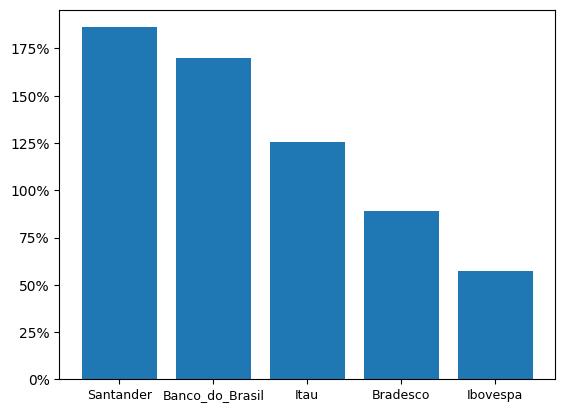

In [228]:
fig, ax = plt.subplots()

ax.bar(df_retornos.index, df_retornos["retornos"])
ax.yaxis.set_major_formatter(ticker.PercentFormatter())

plt.xticks(fontsize =9)
plt.show()

In [168]:
var_lucro_bancos = lucro_bancos.iloc[-1]/lucro_bancos.iloc[0] - 1
var_lucro_bancos = var_lucro_bancos*100
var_lucro_bancos = var_lucro_bancos.sort_values(ascending=False)
var_lucro_bancos

,0
santander,729.931021
bradesco,173.900594
itau,148.226612
banco_do_brasil,94.238574


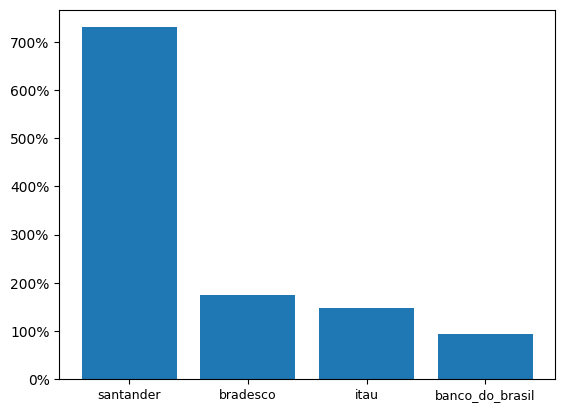

In [167]:
fig, ax = plt.subplots()

ax.bar(var_lucro_bancos.index, var_lucro_bancos)
ax.yaxis.set_major_formatter(ticker.PercentFormatter())

plt.xticks(fontsize =9)
plt.show()

In [196]:
def resample_periodo(dado, periodo):
  dado_periodo_novo = dado.resample(f"{periodo}").last()
  dado_periodo_novo = dado_periodo_novo.pct_change()
  dado_periodo_novo = dado_periodo_novo.dropna()
  return dado_periodo_novo

In [198]:
itau_periodo = resample_periodo(itau, "Y")
banco_do_brasil_periodo = resample_periodo(banco_do_brasil, "Y")
bradesco_periodo = resample_periodo(bradesco, "Y")
santander_periodo = resample_periodo(santander, "Y")
ibovespa_periodo = resample_periodo(ibovespa, "Y")

In [231]:
outperform_banco_do_brasil= banco_do_brasil_periodo - ibovespa_periodo

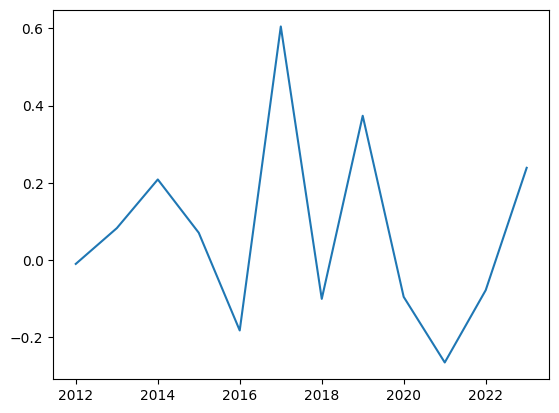

In [232]:
plt.plot(outperform_banco_do_brasil)

In [234]:
meses_positivos = sum(outperform_banco_do_brasil > 0)/len(outperform_banco_do_brasil)
meses_positivos

0.5

In [235]:
def long_short(long, short, periodo):
  var_long = resample_periodo(long, periodo)
  var_short = resample_periodo(short, periodo)
  outperform = var_long - var_short
  display(outperform)
  plt.plot(outperform)

,0
Date,
2011-12-31,0.068404
2012-12-31,-0.058442
2013-12-31,0.247312
2014-12-31,0.254033
2015-12-31,0.013113
2016-12-31,0.110356
2017-12-31,0.037144
2018-12-31,0.177824
2019-12-31,-0.220809


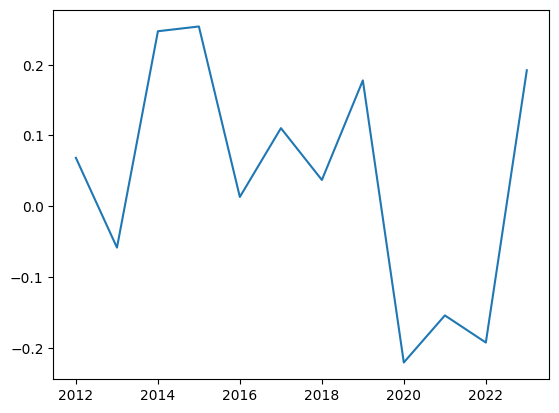

In [236]:
long_short(itau, ibovespa, "Y")

## Resultado da Análise


*   O Santander teve a maior valorização e o maior crescimento dos lucros
*   O Banco do Brasil teve a segunda maior valorização, porém teve o menor crescimento do lucro


